# Projet 3 OpenFoodFacts - Notebook de nettoyage du jeu de données

#Préambule:

L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. On souhaite y participer et proposer une idée d’application.

Après avoir lu l’appel à projets, il est demandé d'effectuer les objectifs suivants:

-Traiter le jeu de données, en réfléchissant à une idée d’application.

-Repérer des variables pertinentes pour les traitements à venir, et nécessaires pour une idée d’application.

-Nettoyer les données en mettant en évidence les éventuelles valeurs manquantes, avec au moins 3 méthodes de traitement adaptées aux variables concernées et en identifiant et en quantifiant les éventuelles valeurs aberrantes de chaque variable.



[Description du jeu de données](https://world.openfoodfacts.org/data/data-fields.txt)

Environnement & Imports: 

In [ ]:
iopub_data_rate_limit=1.0e100
import statistics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


Version des librairies : 

In [ ]:
print("version de numpy: ",numpy.__version__)
print("version de seaborn: ",seaborn.__version__)
print("version de matplotlib: ",matplotlib.__version__)


version de numpy:  1.21.6
version de seaborn:  0.11.2
version de matplotlib:  3.2.2


In [ ]:
!python --version

Python 3.7.13


On charge ici le dataset d'OpenFoodFacts

In [1]:
import pandas as pd
import re
use_colab=True
if use_colab:
  from google.colab import drive
  drive.mount('/content/drive')
df = pd.read_csv('https://drive.google.com/file/d/196Vy5ImAGyfNzqmR1E_D8jm1on97CL13/view?usp=sharing', sep='\t', low_memory=False)

Mounted at /content/drive


In [ ]:
dataframe=df
pd.set_option("display.max_columns",None)
display(dataframe.head())

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ]

On a 162 variables et 320771 produits dans cette liste.

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


On va regarder les Nan

In [ ]:
data=dataframe
data.isnull().sum().sort_values()

last_modified_t                               0
last_modified_datetime                        0
creator                                       2
created_t                                     3
created_datetime                              9
                                          ...  
ingredients_that_may_be_from_palm_oil    320772
ingredients_from_palm_oil                320772
no_nutriments                            320772
nervonic-acid_100g                       320772
water-hardness_100g                      320772
Length: 162, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


Dans le cadre de notre projet, on ne va que se baser sur les produits étant vendus en France étant donné que l'on travaille pour la santé publique.

In [ ]:

    
liste_pays = ['France', 'FR', 'en:FR', 'en:fr', 'en:France', 'Frankreich', 
              'france', 'Réunion', 'Francia', 'French Polynesia', 'Frankrijk', 
              'Nouvelle-Calédonie', 'Martinique', 'Guadeloupe', 
              'Polynésie Française', 'Mayotte']   
data=data[data['countries'].isin(liste_pays)]
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 94485 entries, 0 to 320770
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 117.5+ MB


In [ ]:
data.sample(n=50)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
214857,3263850365614,http://world-fr.openfoodfacts.org/produit/3263...,openfoodfacts-contributors,1385986421,2013-12-02T12:13:41Z,1479414308,2016-11-17T20:25:08Z,Cornichons extra-fins,Cornichons extra-fins pasteurisés au vinaigre,"350 g (185 g net égoutté), 370 ml","Bocal,Verre,Couvercle,Métal,Conserve,Plastique","bocal,verre,couvercle,metal,conserve,plastique","Leader Price,DLP (Distribution Leader Price),G...","leader-price,dlp-distribution-leader-price,gro...","Aliments et boissons à base de végétaux,Alimen...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",NaN,NaN,Christ (Filiale Reitzel Briand) - 65 Rue de Pa...,christ-filiale-reitzel-briand-65-rue-de-paris-...,"Point Vert,Conditionné en France,Eco-Emballages","en:green-dot,fr:conditionne-en-france,fr:eco-e...","Point Vert,Conditionne-en-france,Eco-emballages",EMB 72090D,emb-72090d,"48.05,0.5",NaN,connerre-sarthe-france,"Paris,France",Leader Price,France,en:france,France,"Cornichons, eau, vinaigre d'alcool, petits oig...",sulfites,NaN,NaN,NaN,NaN,NaN,NaN,0.0,[ cornichons -> fr:cornichons ] [ eau -> fr...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,b,Fruits and vegetables,Vegetables,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:pickles,Pickles,http://fr.

Dans le graphique ci-dessous on observe en ordonée le nombre de variables ayant la valeur de Nan correspondante, on observe par exemple 14 variables n'ayant aucun NAN et un peu plus de 8 variables ayant une valeur de Nan supérieur à 200000.

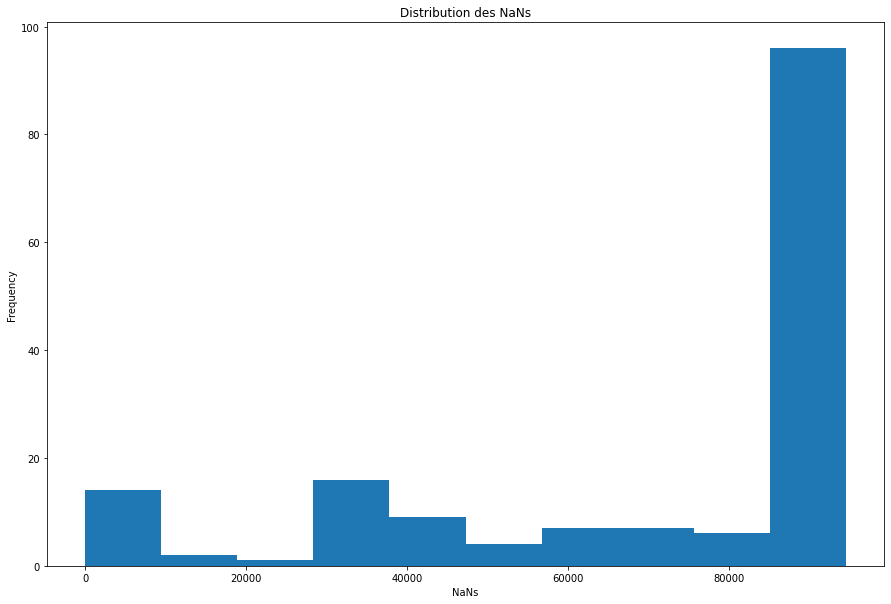

In [ ]:
data.isnull().sum().plot(kind='hist', figsize=(15,10))
plt.title('Distribution des NaNs')
plt.xlabel('NaNs')

plt.show()

On va ici éliminer toutes les variables ayant plus de 75 pourcent de données nulles car elles seront peu utilisables.

In [ ]:
column_with_nan = data.columns[data.isnull().any()]
for column in column_with_nan:
        if data[column].isnull().sum()*100.0/data.shape[0] > 75:
                data.drop(column,1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


On a ici 50 variables qui nous intéressent pour notre projet.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94485 entries, 0 to 320770
Data columns (total 56 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   code                                     94485 non-null  object 
 1   url                                      94485 non-null  object 
 2   creator                                  94485 non-null  object 
 3   created_t                                94485 non-null  object 
 4   created_datetime                         94485 non-null  object 
 5   last_modified_t                          94485 non-null  object 
 6   last_modified_datetime                   94485 non-null  object 
 7   product_name                             87490 non-null  object 
 8   generic_name                             36001 non-null  object 
 9   quantity                                 67819 non-null  object 
 10  packaging                                5597

In [ ]:
data.sample(n=70)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
232901,3436530000208,http://world-fr.openfoodfacts.org/produit/3436...,beniben,1466021048,2016-06-15T20:04:08Z,1466023514,2016-06-15T20:45:14Z,Les Miellées Gourmandes aux Noisettes,Préparation au miel et aux noisettes,125 g,"Verre,Bocal,Métal","verre,bocal,metal","Les Miellées Gourmandes,Les Ruchers de la Baie...","les-miellees-gourmandes,les-ruchers-de-la-baie...","Miels,Pâtes à tartiner,Pâtes à tartiner aux no...","en:spreads,en:breakfasts,en:sweet-spreads,en:b...","Produits à tartiner,Petit-déjeuners,Produits à...","50540,France,Isigny Le Buat","50540,france,isigny-le-buat",NaN,NaN,NaN,France,NaN,France,en:france,France,Miel 88% - noisettes 12% - épices.,NaN,0.0,[ miel-88 -> fr:miel-88 ] [ miel -> fr:miel...,NaN,NaN,0.0,0.0,NaN,Sugary snacks,Sweets,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",fr:pates-a-tartiner,Pâtes à tartiner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274730,5060195903437,http://world-fr.openfoodfacts.org/produit/5060...,kiliweb,1489701113,2017-03-16T21:51:53Z,1489701113,2017-03-16T21:51:53Z,Genius Sans Gluten Brioche,NaN,NaN,NaN,NaN,Genius Gluten Free,genius-gluten-free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,1389.0,NaN,2.00,NaN,14.5,4.5,3.80,0.7500,0.295276,6.0,6.0
184381,26003807,http://world-fr.openfoodfacts.org/produit/2600...,zouzou,1437326595,2015-07-19T17:23:15Z,1437415411,2015-07-20T18:03:31Z,Orange à la pulpe,Boisson rafraichissante gazéifiée au jus d'ora...,"1,5 l",Plastique,plastique,River,river,"Boissons,Boissons à base de végétaux,Boissons ...","en:plant-based-foods-and-beverages,en:beverage...","Aliments et boissons à base de végétaux,Boisso...",NaN,NaN,NaN,NaN,NaN,France,NaN,France,en:france,France,"eau gazéifiée, jus d'orange 12% et pulpe 2% à ...",200 ml,4.0,[ eau-gazeifiee -> fr:eau-gazeifiee ] [ eau...,"en:e330,en:e211,en:e300,en:e161b","E330 - Acide citrique,E211 - Benzoate de sodiu...",0.0,0.0,e,Beverages,Sweetened beverages,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:fruit-sodas,Sodas aux fruits,http://fr.openfoodfacts.org/images/products/26...,http://fr.openfoodfacts.org/images/products/26...,170.0,0.25,0.25,10.0,10.0,NaN,0.25,0.0000,0.000000,13.0,2.0
209437,3256220171236,http://world-fr.openfoodfacts.org/produit/3256...,foods41,1402678730,2014-06-13T16:58:50Z,1461063607,2016-04-19T11:00:07Z,capucinno nature,NaN,225 g,NaN,NaN,U,u,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,http://fr.openfoodfacts.org/images/products/32...,http://fr.openfoodfacts.org/images/products/32...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

On remplit les Nan dans les colonnes de nature float avec leur médian pour fausser notre analyse le moins possible et mettre une valeur qui ne sera pas absurde.

On observe aussi qu'on a pas de doublons ici.

In [ ]:

for col in data.columns:
     if data[col].dtypes==np.float64:
          data[col].fillna(value=data[col].median(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
copies=data['code']
produits=data['product_name']
produits.duplicated().sum() 
display(produits.head())

0      Farine de blé noir
46          Filet de bœuf
48                    NaN
136               Twix x2
182     lentilles vertes 
Name: product_name, dtype: object

In [ ]:
data.sample(n=100)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
308563,8420878058217,http://world-fr.openfoodfacts.org/produit/8420...,openfoodfacts-contributors,1409503523,2014-08-31T16:45:23Z,1423587677,2015-02-10T17:01:17Z,La Originale Carbonara,Pizza carbonara,370 g (2/3 personnes),"Frais,Barquette,Plastique,Opercule,Film plasti...","frais,barquette,plastique,opercule,film-plasti...",Palacios,palacios,"Plats préparés frais,Pizzas,Pizzas fraîches,Pi...","en:fresh-foods,en:meals,en:pizzas-pies-and-qui...","Frais,Plats préparés,Pizzas tartes salées et q...",Palacios Alimentación - Ctra. De Logroño - s/n...,palacios-alimentacion-ctra-de-logrono-s-n-2612...,"Eco-Emballages,Point vert","en:green-dot,fr:eco-emballages","Point Vert,Eco-emballages","Bollène,France",Dia,France,en:france,France,"Base : Farine de _blé_, eau, huile de tourneso...",NaN,13.0,[ base -> fr:base ] [ farine-de-ble -> fr:f...,"en:e450i,en:e500ii,en:e202,en:e330,en:e415,en:...","E450i - Pyrophosphate de sodium acide,E500ii -...",0.0,0.0,c,Composite foods,Pizza pies and quiche,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:meals,Plats préparés,http://fr.openfoodfacts.org/images/products/84...,http://fr.openfoodfacts.org/images/products/84...,1025.0,9.0,4.2,29.0,3.3,1.5,11.0,0.8001,0.315000,3.0,3.0
192746,3083680565882,http://world-fr.openfoodfacts.org/produit/3083...,zoubiddaaa,1373775925,2013-07-14T04:25:25Z,1490980372,2017-03-31T17:12:52Z,Bonduelle Feuille de Chêne,Salade conditionnée sous atmosphère protectrice,175 g,Sachet biodégradable,sachet-biodegradable,Bonduelle,bonduelle,Salades,"en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",NaN,NaN,Sans conservateur,en:no-preservatives,Sans conservateurs,Troyes,Carrefour,France,en:france,France,feuille de chêne,50 g,0.0,[ feuille-de-chene -> fr:feuille-de-chene ] ...,NaN,NaN,0.0,0.0,NaN,Fruits and vegetables,Vegetables,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",en:fresh-vegetables,Légumes frais,NaN,NaN,64.0,0.5,0.5,0.6,0.5,1.3,1.4,0.5700,0.224409,8.0,7.0
200132,3222472111122,http://world-fr.openfoodfacts.org/produit/3222...,openfoodfacts-contributors,1429095616,2015-04-15T11:00:16Z,1445192327,2015-10-18T18:18:47Z,Panettone pur beurre,Brioche pur beurre aux raisins secs et aux éco...,500 g,Carton,carton,Casino,casino,"Gâteaux,Brioches,Panettone","en:sugary-snacks,en:biscuits-and-cakes,en:dess...","Snacks sucrés,Biscuits et gâteaux,Desserts,Vie...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,"Farine de _blé_, eau, raisins secs 13,9 %, _be...",50 g,1.0,[ farine-de-ble -> fr:farine-de-ble ] [ far...,en:e471,E471 - Mono- et diglycérides d'acides gras ali...,0.0,1.0,d,sugary-snacks,pastries,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:cakes,Gâteaux,http://fr.openfoodfacts.org/images/products/32...,http://fr.openfoodfacts.org/images/products/32...,1469.0,12.0,7.5,54.0,24.0,1.3,6.3,0.3900,0.153543,17.0,17.0
227772,3350

On va maintenant s'interesser aux valeurs abérrantes. On prend tout les produits ayant au moins un nutriment ayant une valeur non nulle. On observera que la quantité de gras, de protéines, de sel doivent rester sous le seuil des 100 grammes alors que l'energie, en kJ doit rester environ en dessous de 4000 kJ étant donné qu'une calorie est égale environ à 4kJ

In [ ]:
def recherche_produit(data, suffix='_100g'):
  tab = []
  for col in data.columns:
      if '_100g' in col: tab.append(col)
  data_subset_columns = data[tab]
  return data_subset_columns

data_subset= recherche_produit(data,'_100g')
data_subset.sample(n=60)


,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
275786,184.0,6.8,0.30,14.0,2.00,0.9,0.6,0.6300,0.248031,1.0,1.0
192125,406.0,0.3,1.90,16.4,15.80,5.1,4.4,0.0690,0.027165,8.0,7.0
255023,1276.0,7.0,3.00,50.0,5.00,3.5,13.0,0.3000,0.118110,-2.0,-2.0
233681,1027.0,6.8,1.90,14.0,4.00,1.3,6.0,0.5700,0.224409,8.0,7.0
246915,1027.0,6.8,1.90,14.0,4.00,1.3,6.0,0.5700,0.224409,8.0,7.0
237869,1343.0,0.0,1.90,80.0,4.00,1.3,0.3,0.5700,0.224409,8.0,7.0
214915,1524.0,1.5,0.30,74.0,3.50,4.0,10.5,0.0000,0.000000,-6.0,-6.0
182410,1933.0,6.8,9.70,14.0,22.40,9.9,7.8,0.4700,0.185039,15.0,15.0
175438,188.0,0.0,0.00,11.0,3.30,0.0,0.0,0.0000,0.000000,0.0,-5.0
255126,201.0,6.8,0.00,14.0,11.00,0.0,0.0,0.0000,0.000000,15.0,2.0


In [ ]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94485 entries, 0 to 320770
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   energy_100g              94485 non-null  float64
 1   fat_100g                 94485 non-null  float64
 2   saturated-fat_100g       94485 non-null  float64
 3   carbohydrates_100g       94485 non-null  float64
 4   sugars_100g              94485 non-null  float64
 5   fiber_100g               94485 non-null  float64
 6   proteins_100g            94485 non-null  float64
 7   salt_100g                94485 non-null  float64
 8   sodium_100g              94485 non-null  float64
 9   nutrition-score-fr_100g  94485 non-null  float64
 10  nutrition-score-uk_100g  94485 non-null  float64
dtypes: float64(11)
memory usage: 8.7 MB


In [ ]:
data_subset.dtypes

energy_100g                float64
fat_100g                   float64
saturated-fat_100g         float64
carbohydrates_100g         float64
sugars_100g                float64
fiber_100g                 float64
proteins_100g              float64
salt_100g                  float64
sodium_100g                float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
dtype: object

In [ ]:
data_subset.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,9.448500e+04,94485.000000,94485.000000,94485.000000,94485.000000,94485.000000,94485.000000,94485.000000,94485.000000,94485.000000,94485.000000
mean,1.118690e+03,9.858213,4.091846,20.226255,9.817266,1.864943,7.161599,0.942541,0.371085,8.372387,7.799524
std,1.061217e+04,12.114615,6.976858,19.823442,15.746164,3.208066,6.439825,3.418618,1.345864,7.103385,7.387981
min,0.000000e+00,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,-15.000000,-15.000000
25%,6.960000e+02,6.800000,1.000000,14.000000,2.500000,1.300000,4.100000,0.230000,0.090551,4.000000,3.000000
50%,1.027000e+03,6.800000,1.900000,14.000000,4.000000,1.300000,6.000000,0.570000,0.224409,8.000000,7.000000
75%,1.370000e+03,6.800000,3.100000,14.000000,7.200000,1.300000,7.500000,0.817000,0.321654,12.000000,11.000000
max,3.251373e+06,380.000000,210.000000,190.000000,105.000000,178.000000,100.000000,211.000000,83.000000,40.000000,36.000000


Ici on observe bien par exemple avec l'energie des valeurs qui sont abbérantes que l'on va donc ici supprimer

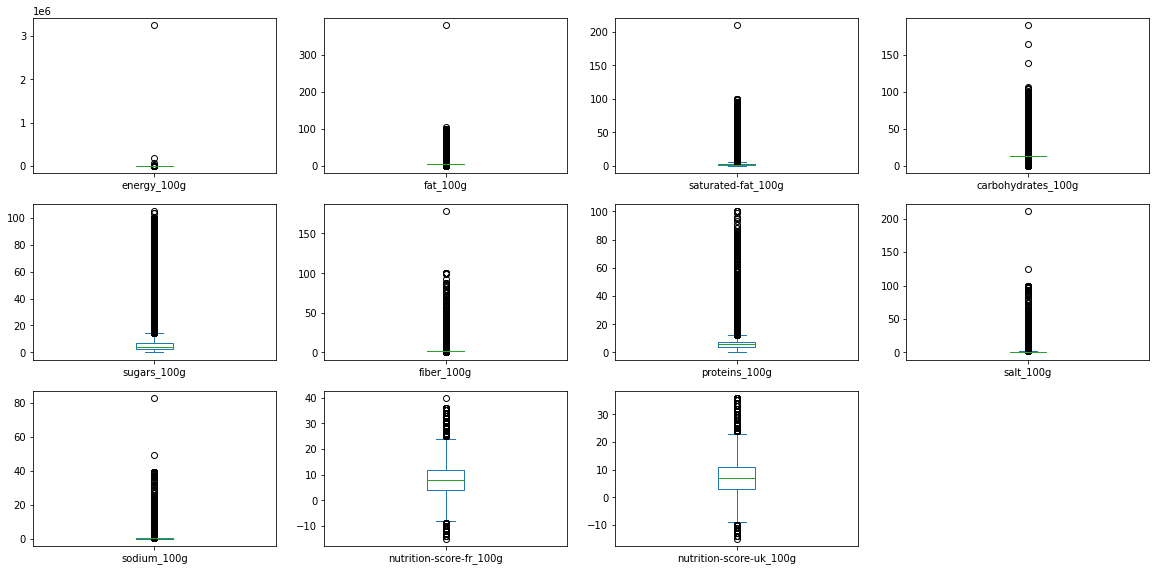

In [ ]:
data_subset.select_dtypes(include=float).plot(kind='box', subplots=True, figsize=(20,20), layout=(6,4))

plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


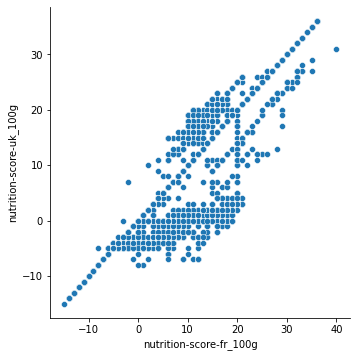

In [ ]:
sns.pairplot(data_subset, x_vars=['nutrition-score-fr_100g'], y_vars=['nutrition-score-uk_100g'], size=5)

plt.show()

On observe via le tableau ci-dessus des valeurs abbérantes. On va donc corriger tout cela en ajustant les valeurs maximales.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


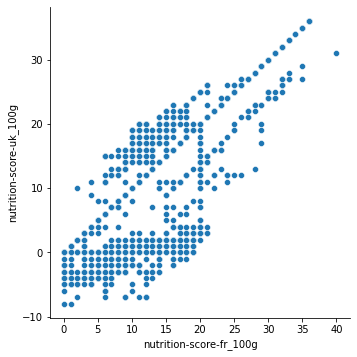

In [ ]:
datas=data_subset
#datas = datas[(datas[datas.columns.difference([' energy_100g'])]<= 4000])
datas = datas[(datas[datas.columns.difference([' energy_100g'])]<= 3800)]
datas = datas[(datas[datas.columns.difference(['nutrition-score_fr-100g', 'nutrition-score-uk_100g'])] >= 0).all(1)]
datas = datas[(datas['fat_100g'] + datas['carbohydrates_100g'] + datas['proteins_100g'])<=100]
datas = datas[(datas['fiber_100g'])<=100]
datas = datas[(datas['salt_100g'])<=100]
datas[datas['nutrition-score-uk_100g'] != datas['nutrition-score-fr_100g']].shape
(175, 28)
datas[datas['nutrition-score-uk_100g'] == datas['nutrition-score-fr_100g']].shape
(124054, 28)
sns.pairplot(datas, x_vars=['nutrition-score-fr_100g'], y_vars=['nutrition-score-uk_100g'], size=5)

plt.show()

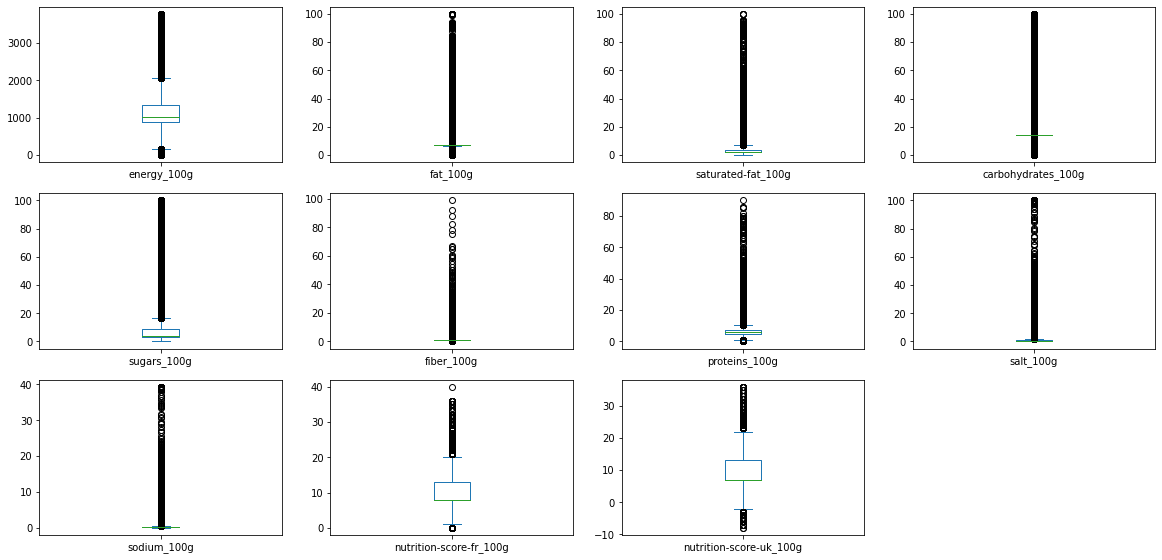

In [ ]:
datas.select_dtypes(include=float).plot(kind='box', subplots=True, figsize=(20,20), layout=(6,4))

plt.show()

Ici on va donc mettre des valeurs max pour supprimer les valeurs abbérantes et on va mettre en commun le nutriscore francais et anglais.

In [ ]:
datas['nutrition-score-100g'] = datas['nutrition-score-uk_100g'][datas['nutrition-score-uk_100g'] == datas['nutrition-score-fr_100g']]
datas = datas.drop(columns=['nutrition-score-uk_100g', 'nutrition-score-fr_100g'])
datas.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-100g
count,84384.000000,84384.000000,84384.000000,84384.000000,84384.000000,84384.000000,84384.000000,84384.000000,84384.000000,42403.000000
mean,1117.981298,10.509597,4.486487,19.850761,10.476856,1.615121,7.067918,1.007383,0.396615,11.086786
std,613.299422,12.281499,7.184772,19.140367,16.337562,2.439976,6.167929,3.485940,1.372415,7.995085
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,879.000000,6.800000,1.900000,14.000000,3.300000,1.300000,4.600000,0.460000,0.181102,3.000000
50%,1027.000000,6.800000,1.900000,14.000000,4.000000,1.300000,6.000000,0.570000,0.224409,11.000000
75%,1351.000000,7.000000,3.900000,14.000000,8.500000,1.300000,7.000000,0.900000,0.354331,17.000000
max,3774.000000,100.000000,100.000000,100.000000,100.000000,99.000000,90.000000,100.000000,39.370079,36.000000


In [ ]:
display(datas.head())

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-100g
0,1027.0,6.8,1.9,14.0,4.0,1.3,6.0,0.57,0.224409,NaN
46,1027.0,6.8,1.9,14.0,4.0,1.3,6.0,0.57,0.224409,NaN
48,1027.0,6.8,1.9,14.0,4.0,1.3,6.0,0.57,0.224409,NaN
136,1027.0,6.8,1.9,14.0,4.0,1.3,6.0,0.57,0.224409,NaN
182,1027.0,6.8,1.9,14.0,4.0,1.3,6.0,0.57,0.224409,NaN


Ici on va éliminer les valeurs abbérantes eloignées de la moyenne avec un écart type supérieur à 3. On a donc un dataset plus propre.

In [ ]:

datas = datas[np.abs(datas['energy_100g']-datas['energy_100g'].mean())<=(3*datas['energy_100g'].std())]
datas = datas[np.abs(datas['fat_100g']-datas['fat_100g'].mean())<=(3*datas['fat_100g'].std())]
datas = datas[np.abs(datas['saturated-fat_100g']-datas['saturated-fat_100g'].mean())<=(3*datas['saturated-fat_100g'].std())]
datas = datas[np.abs(datas['carbohydrates_100g']-datas['carbohydrates_100g'].mean())<=(3*datas['carbohydrates_100g'].std())]
datas = datas[np.abs(datas['sugars_100g']-datas['sugars_100g'].mean())<=(3*datas['sugars_100g'].std())]
datas = datas[np.abs(datas['fiber_100g']-datas['fiber_100g'].mean())<=(3*datas['fiber_100g'].std())]
datas = datas[np.abs(datas['proteins_100g']-datas['proteins_100g'].mean())<=(3*datas['proteins_100g'].std())]
datas = datas[np.abs(datas['salt_100g']-datas['salt_100g'].mean())<=(3*datas['salt_100g'].std())]
datas = datas[np.abs(datas['sodium_100g']-datas['sodium_100g'].mean())<=(3*datas['sodium_100g'].std())]
datas = datas[np.abs(datas['nutrition-score-100g']-datas['nutrition-score-100g'].mean())<=(3*datas['nutrition-score-100g'].std())]


In [ ]:
datas.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-100g
count,31399.000000,31399.000000,31399.000000,31399.000000,31399.000000,31399.000000,31399.000000,31399.000000,31399.000000,31399.00000
mean,1071.439856,10.605516,4.724850,23.829056,11.966110,1.547355,7.315183,0.890668,0.350657,9.47199
std,675.469988,8.774928,5.045834,21.340394,14.248035,1.598057,5.813506,0.742200,0.292206,7.71793
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,489.000000,6.000000,1.000000,12.000000,1.300000,0.200000,3.100000,0.170000,0.066929,2.00000
50%,941.000000,6.800000,2.700000,14.000000,4.500000,1.300000,6.000000,0.800000,0.314961,8.00000
75%,1664.000000,14.600000,7.000000,37.250000,20.000000,2.000000,9.800000,1.350000,0.531496,15.00000
max,2954.000000,39.700000,20.400000,77.800000,53.500000,8.150000,24.800000,3.302000,1.300000,32.00000


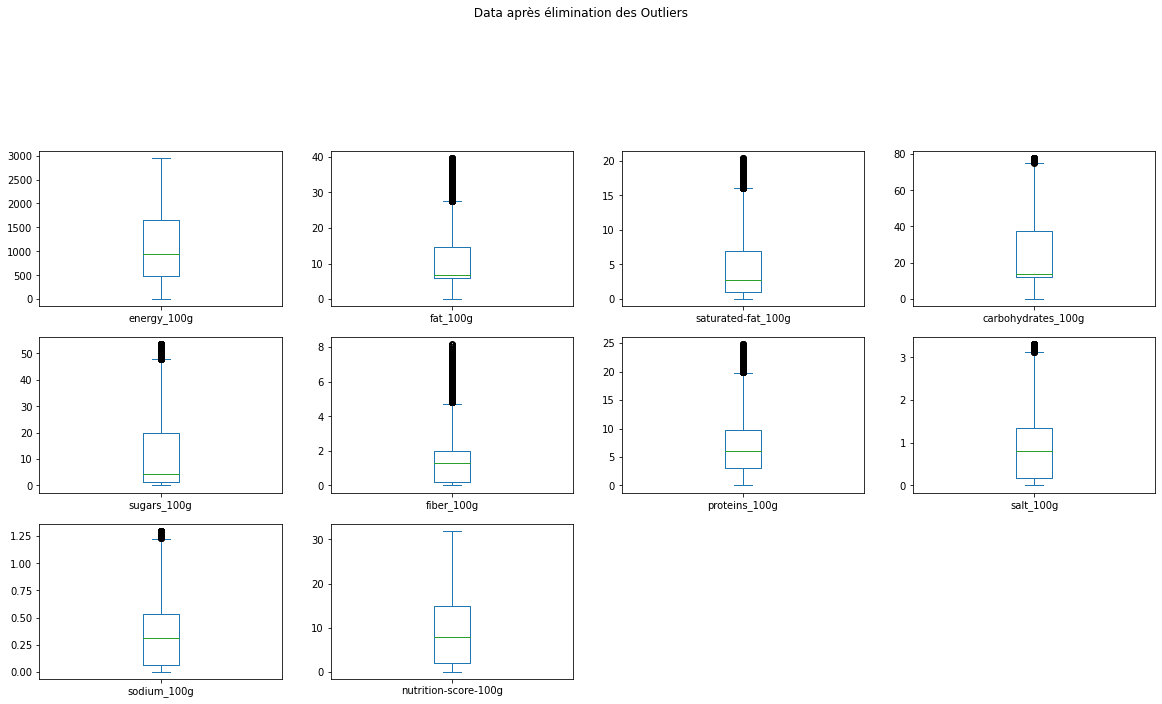

In [ ]:
datas.select_dtypes(include=float).plot(kind='box', subplots=True, title=' Data après élimination des Outliers', figsize=(20,20), layout=(6,4))

plt.show()

On observe ici via l'histogramme que nos valeurs sont rationelles et donc plus cohérentes pour l'application

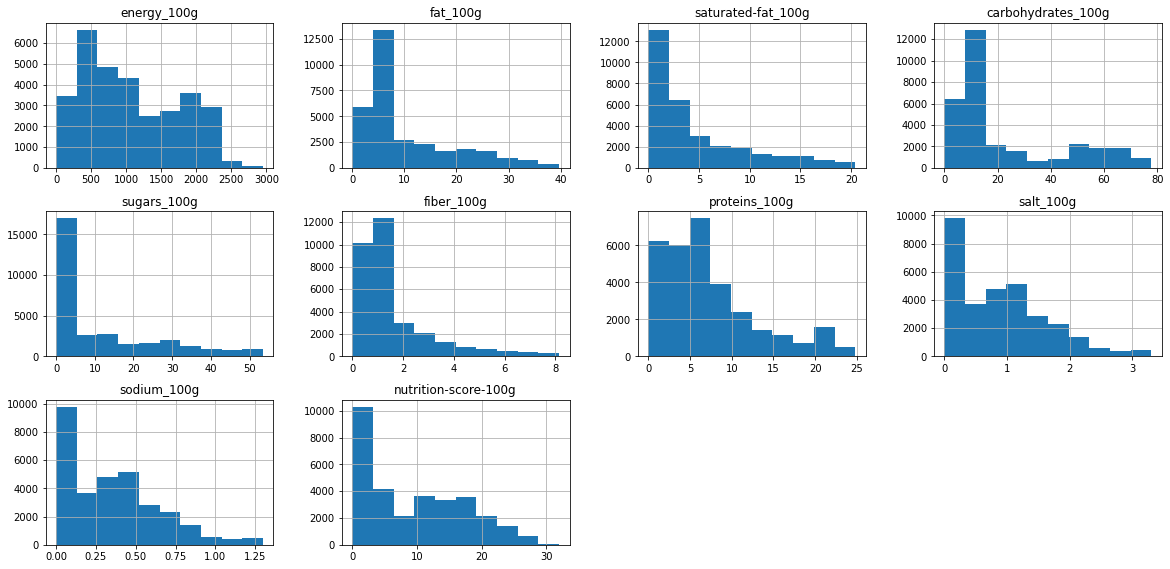

In [ ]:
datas.hist(figsize=(20,20), layout=(6,4))#afficher images produits avec un bon et mauvais nutriscore (markdown)
#mettre beaucoup plus de lignes d'explication
#faire du machine learning : classification , regarder les couleurs 
plt.show() 

On va ici choisir certaines colonnes qui vont constituer notre dataframe nettoyé et qui nous serviront pour la création de notre application.

In [ ]:
choix=['code','creator','product_name','quantity','brands_tags','categories_tags','countries_tags','additives_fr','nutrition_grade_fr','states_fr','main_category']
data_subset2=data[choix]
data_subset2.sample(n=30)

,code,creator,product_name,quantity,brands_tags,categories_tags,countries_tags,additives_fr,nutrition_grade_fr,states_fr,main_category
194048,3103220059531,openfoodfacts-contributors,Cocobat,300 g,haribo,NaN,en:france,NaN,e,"A compléter,Informations nutritionnelles compl...",NaN
199451,3217450004664,openfoodfacts-contributors,Sauce Ketchup par Marc Veyrat,320 g,le-jardin-d-orante,"en:groceries,en:sauces,en:tomato-sauces,en:ket...",en:france,"E415 - Gomme xanthane,E330 - Acide citrique",c,"A vérifier,Complet,Informations nutritionnelle...",en:groceries
201973,3228022140062,sebleouf,Emmental Grand Affiné,200 g,president,"en:dairies,en:cheeses,en:cooked-pressed-cheese...",en:france,NaN,c,"A vérifier,Complet,Informations nutritionnelle...",en:emmentaler
224593,3308100000256,tacite,Fromages râpés (30% MG),1 kg,"sans-marque,ftrecal","en:dairies,en:cheeses,en:grated-cheese",en:france,"E331 - Citrates de sodium,E339 - Orthophosphat...",NaN,"A vérifier,Complet,Informations nutritionnelle...",en:cheeses
302244,8002333008908,openfoodfacts-contributors,NaN,NaN,NaN,NaN,en:france,NaN,NaN,"A compléter,Informations nutritionnelles à com...",NaN
225159,3329486251124,kiliweb,FARINE DE BLE GRISE T110,NaN,markal,NaN,en:france,NaN,a,"A compléter,Informations nutritionnelles compl...",NaN
106485,00897327,kiliweb,Oeuf Et Jambon,NaN,mark-et-spencer,NaN,en:france,NaN,a,"A compléter,Informations nutritionnelles compl...",NaN
220120,3270190181262,mat444,compote pomme allégée en sucres,800 g,carrefour,"en:plant-based-foods-and-beverages,en:plant-ba...",en:france,E300 - Acide ascorbique,a,"A vérifier,Complet,Informations nutritionnelle...",en:desserts
187464,3017760002905,minouche,"Véritable petit écolier tendre coeur, 6 biscuits",120 g,"lu,petit-ecolier,kraft-foods","en:sugary-snacks,en:biscuits-and-cakes,en:bisc...",en:france,"E322 - Lécithines,E503 - Carbonates d'ammonium...",e,"A vérifier,Complet,Informations nutritionnelle...",en:biscuits
196737,3168930010456,kiliweb,Chips Nature,NaN,lay-s-gourmet,NaN,en:france,NaN,c,"A compléter,Informations nutritionnelles compl...",NaN


In [ ]:
data_clean =  datas.merge(data_subset2, how='inner', left_index=True, right_index=True)
data_clean.drop_duplicates()
display(data_clean.head())

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-100g,code,creator,product_name,quantity,brands_tags,categories_tags,countries_tags,additives_fr,nutrition_grade_fr,states_fr,main_category
191,2406.0,6.8,2.9,14.0,50.3,3.9,9.5,0.003,0.001181,14.0,0000010207260,kiliweb,Praliné Amande Et Noisette,NaN,alice-delice,NaN,en:france,NaN,d,"A compléter,Informations nutritionnelles compl...",NaN
234,1079.0,6.8,11.0,14.0,1.0,1.4,7.5,0.800,0.314961,15.0,0000069161025,kiliweb,Tarte Poireaux Et Lardons,NaN,bo-frost,NaN,en:france,NaN,d,"A compléter,Informations nutritionnelles compl...",NaN
242,1900.0,23.0,2.5,55.0,26.0,1.5,6.0,0.660,0.259843,12.0,000010,jeanbono,Madeleines nature,880 g,bijou,"en:sugary-snacks,en:biscuits-and-cakes,en:dess...",en:france,"E422 - Glycérol,E503 - Carbonates d'ammonium,E...",d,"A vérifier,Complet,Informations nutritionnelle...",en:cakes
279,1768.0,19.0,2.5,56.0,28.0,1.8,5.8,0.650,0.255906,13.0,000030,beniben,Cakes Raisins,900 g,bijou,"en:sugary-snacks,en:biscuits-and-cakes,en:dess...",en:france,"E422 - Glycérol,E503 - Carbonates d'ammonium,E...",d,"A vérifier,Complet,Informations nutritionnelle...",en:cakes
283,1670.0,15.0,2.0,60.0,34.0,1.5,4.9,0.600,0.236220,12.0,000031,beniben,Cakes aux Fruits,600 g,bijou,"en:sugary-snacks,en:biscuits-and-cakes,en:dess...",en:france,"E202 - Sorbate de potassium,E220 - Anhydride s...",d,"A vérifier,Complet,Informations nutritionnelle...",en:pastries


On a donc ici un Dataframe nommé data_clean qui contient les produits ayant au moins un nutriment non null et qui a des valeurs maximales ajustés et réalistes.

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31399 entries, 191 to 320740
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   energy_100g           31399 non-null  float64
 1   fat_100g              31399 non-null  float64
 2   saturated-fat_100g    31399 non-null  float64
 3   carbohydrates_100g    31399 non-null  float64
 4   sugars_100g           31399 non-null  float64
 5   fiber_100g            31399 non-null  float64
 6   proteins_100g         31399 non-null  float64
 7   salt_100g             31399 non-null  float64
 8   sodium_100g           31399 non-null  float64
 9   nutrition-score-100g  31399 non-null  float64
 10  code                  31399 non-null  object 
 11  creator               31399 non-null  object 
 12  product_name          31220 non-null  object 
 13  quantity              22436 non-null  object 
 14  brands_tags           31219 non-null  object 
 15  categories_tags 

In [ ]:
data_clean.sample(n=100)

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-100g,code,creator,product_name,quantity,brands_tags,categories_tags,countries_tags,additives_fr,nutrition_grade_fr,states_fr,main_category
244804,780.0,8.0,1.5,15.0,3.5,1.3,13.0,1.80,0.708661,5.0,3596690137043,phoenix,Cordon Bleu Double Cheese,200 g (2 x 100 g),pere-dodu,"en:meats,en:meals,en:poultries,en:chickens,en:...",en:france,"E331 - Citrates de sodium,E316 - Erythorbate d...",c,"A vérifier,Complet,Informations nutritionnelle...",en:breaded-products
210357,418.0,6.8,2.0,14.0,13.9,0.1,3.8,0.08,0.031496,3.0,3256221955309,kiliweb,"Yaourts Brassés à La Pulpe De Fruits U Bio,",NaN,u-bio,NaN,en:france,NaN,c,"A compléter,Informations nutritionnelles compl...",NaN
288081,200.0,2.0,0.2,7.0,5.0,1.3,0.8,0.07,0.027559,1.0,7610612016004,firepowi,Swiss Cereal Drink,1L,soyana,"en:plant-based-foods-and-beverages,en:beverage...",en:france,NaN,b,"A compléter,Informations nutritionnelles compl...",en:beverages
298656,2095.0,22.0,14.0,65.0,39.0,2.8,6.4,0.60,0.236220,23.0,7622210421968,openfoodfacts-contributors,Petit écolier chocolat au lait,150g (12 biscuits),lu,"en:sugary-snacks,en:biscuits-and-cakes,en:bisc...",en:france,"E503 - Carbonates d'ammonium,E500 - Carbonates...",e,"A vérifier,Complet,Informations nutritionnelle...",en:biscuits
219755,1305.0,6.8,13.3,14.0,3.1,0.6,8.2,1.18,0.464567,18.0,3270160897087,kiliweb,Mini Quiches,NaN,picard,NaN,en:france,NaN,d,"A compléter,Informations nutritionnelles compl...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220244,1005.0,13.0,3.7,21.0,3.5,0.9,8.3,0.98,0.385827,3.0,3270190216056,phoenix,Quiche Lorraine,300g - (2 x 150g),carrefour,"en:frozen-foods,en:meals,en:pizzas-pies-and-qu...",en:france,"E330 - Acide citrique,E250 - Nitrite de sodium...",c,"A vérifier,Complet,Informations nutritionnelle...",en:frozen-foods
303039,736.0,6.8,0.0,14.0,37.5,0.0,0.5,0.08,0.031496,10.0,8005140005351,date-limite-app,Crème balsamique de modene,250 ml,borgo-gasale,fr:creme-balsamique-de-modene,en:france,NaN,c,"A compléter,Informations nutritionnelles compl...",fr:creme-balsamique-de-modene
189335,406.0,2.5,1.8,10.6,10.0,1.3,7.8,0.09,0.035433,0.0,3033491027680,tacite,Danio vanille,150 g,danone,"en:dairies,en:yogurts,en:sweetened-yogurts,en:...",en:france,"E412 - Gomme de guar,E331 - Citrates de sodium",b,"A vérifier,Complet,Informations nutritionnelle...",en:yogurts
209535,906.0,18.9,7.1,0.6,0.6,0.6,11.3,1.75,0.688976,16.0,3256220259552,nash,Saucisses Cocktail goût chili,240g,u,"en:meats,en:prepared-meats,en:sausages,fr:sauc...",en:france,"E451 - Triphosphates,E407 - Carraghénanes,E300...",d,"A vérifier,Complet,Informations nutritionnelle...",en:sausages


In [ ]:
data_clean = data_clean[~((data.product_name.isnull()))]
data_clean.sample(n=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-100g,code,creator,product_name,quantity,brands_tags,categories_tags,countries_tags,additives_fr,nutrition_grade_fr,states_fr,main_category
203219,1027.0,6.8,1.9,14.0,4.0,1.3,6.0,0.57,0.224409,0.0,3242272877059,bobby-jean,Le classic thon oeuf mayo légère,150g,sodebo,NaN,en:france,NaN,b,"A compléter,Informations nutritionnelles compl...",NaN
298598,1865.0,23.0,11.0,55.0,32.0,1.7,5.0,0.90,0.354331,23.0,7622210388100,openfoodfacts-contributors,Milka choco twist,5x28g,milka,"en:sugary-snacks,en:biscuits-and-cakes,en:dess...",en:france,"E322 - Lécithines,E422 - Glycérol,E450i - Pyro...",e,"A compléter,Informations nutritionnelles compl...",en:cakes
179066,836.0,5.6,2.3,25.7,5.7,1.3,10.4,1.70,0.669291,12.0,20283247,tacite,2 Classic Burgers,2 * 140 g (280 g),mcennedy,"en:frozen-foods,en:sandwiches,en:hamburgers",en:france,NaN,d,"A compléter,Informations nutritionnelles compl...",en:sandwiches
195708,1395.0,19.3,6.5,30.7,3.2,1.3,8.3,0.68,0.267717,12.0,3160791637773,teolemon,Les Tartelettes Raffinées,165 g,"labeyrie,les-collections-labeyrie","en:frozen-foods,en:salty-snacks,en:appetizers,...",en:france,"E301 - Ascorbate de sodium,E250 - Nitrite de s...",d,"A vérifier,Complet,Informations nutritionnelle...",en:pies
260988,143.0,0.1,0.1,6.3,6.1,1.3,0.6,1.30,0.511811,0.0,40198590,tacite,Lanières de cornichons aigres-doux,330 g (180 g égoutté),kuhne,"en:plant-based-foods-and-beverages,en:plant-ba...",en:france,E101 - Riboflavine,b,"A vérifier,Complet,Informations nutritionnelle...",en:pickles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251501,720.0,17.3,16.0,3.0,2.2,1.3,1.7,0.05,0.019685,12.0,3760020508401,openfoodfacts-contributors,Lait de coco,225 ml,"jardin-bio,lea-nature","en:plant-based-foods-and-beverages,en:beverage...",en:france,E412 - Gomme de guar,d,"A vérifier,Complet,Informations nutritionnelle...",en:beverages
226127,374.0,0.8,0.0,0.0,0.0,1.3,22.0,1.80,0.708661,3.0,3336370031649,tacite,Crevettes entières cuites réfrigérées,"0,500 kg","sans-marque,delabli","en:seafood,en:crustaceans,en:shrimps,en:prawns",en:france,"E223 - Disulfite de sodium,E330 - Acide citrique",c,"A vérifier,Complet,Informations nutritionnelle...",en:crustaceans
191546,2045.0,20.0,9.4,71.0,40.0,2.0,4.7,0.80,0.314961,24.0,3056440070896,dupont,Bastogne,260g,"lu,mondelez","en:sugary-snacks,en:biscuits-and-cakes,en:bisc...",en:france,"E500 - Carbonates de sodium,E150a - Caramel E150a",e,"A vérifier,Complet,Informations nutritionnelle...",en:biscuits
215834,2015.0,20.0,10.0,69.0,29.0,1.3,6.0,0.51,0.200787,23.0,3263852915718,openfoodfacts-contributors,Fête Foraine,125 g,leader-price,"en:sugary-snacks,en:biscuits-and-cakes,en:bisc...",en:france,"E322 - Lécithines,E503 - Carbonates d'ammonium...",e,"A vérifier,Complet,Informations nutritionnelle...",en:biscuits


On observe ici qu'il y a 3748 produits qui sont des duplicatas, on va donc nettoyer cela et s'en débarasser.

In [ ]:
copies1=data_clean['code']
produits1=data_clean['product_name']
produits1.duplicated().sum() 

3748

In [ ]:
data_clean1 = data_clean.drop_duplicates(subset=['product_name'])
data_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27472 entries, 191 to 320740
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   energy_100g           27472 non-null  float64
 1   fat_100g              27472 non-null  float64
 2   saturated-fat_100g    27472 non-null  float64
 3   carbohydrates_100g    27472 non-null  float64
 4   sugars_100g           27472 non-null  float64
 5   fiber_100g            27472 non-null  float64
 6   proteins_100g         27472 non-null  float64
 7   salt_100g             27472 non-null  float64
 8   sodium_100g           27472 non-null  float64
 9   nutrition-score-100g  27472 non-null  float64
 10  code                  27472 non-null  object 
 11  creator               27472 non-null  object 
 12  product_name          27472 non-null  object 
 13  quantity              19301 non-null  object 
 14  brands_tags           27393 non-null  object 
 15  categories_tags 

In [ ]:
produits2=data_clean1['product_name']
produits2.duplicated().sum()

0

A partir de notre dataframe nettoyé, on va maintenant calculer les scores nutritionnels et les comparer à ceux qui nous sont fournis de base.
On prend donc les nutriments qui vont nous servir dans nos calculs.

In [ ]:
data_clean1.set_index("code").to_csv("/content/drive/MyDrive/cleaning_openfoodfacts.csv", sep='\t')